## Standard Error of Regression Coefficients

According to [Wikipedia](https://en.wikipedia.org/wiki/Variance_inflation_factor), the standard error of the estimate of $\beta_j$ in a linear regression equation is the square root of the $(j + 1)^{th}$ diagonal element of $s^2(X^TX)^{−1}$, where $s$ is the root mean squared error (RMSE) of the model.

In [150]:
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [151]:
X, y = make_regression(n_features=10,
                       n_informative=2,
                      noise=10,
                      random_state=42)

In [108]:
X = X - np.mean(X, axis=0)

In [152]:
df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                  columns=['x1', 'x2', 'x3',
                           'x4', 'x5', 'x6',
                           'x7', 'x8', 'x9',
                          'x10', 'target'])

In [153]:
#df

In [154]:
lr = LinearRegression()
lr.fit(X, y)
s2 = mean_squared_error(y, lr.predict(X))
s2

82.96341956843713

In [211]:
sum((y - lr.predict(X))**2) / 100

82.96341956843715

Do I want the *variance* of the residuals?

In [214]:
(y - lr.predict(X)).var()

82.96341956843713

In [215]:
(y - lr.predict(X)).var(ddof=11)

93.21732535779452

In [155]:
lr.coef_

array([-0.21072837, -1.90917999, -0.62144467, 15.8309503 ,  0.25274792,
        0.70152564,  9.9316305 ,  0.48297844, -0.04027294, -1.33661932])

In [163]:
lr.intercept_

1.6292415773258941

In [156]:
model = sm.OLS(y, sm.add_constant(X)).fit()

In [157]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     31.74
Date:                Fri, 28 May 2021   Prob (F-statistic):           3.44e-25
Time:                        14:41:57   Log-Likelihood:                -362.81
No. Observations:                 100   AIC:                             747.6
Df Residuals:                      89   BIC:                             776.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6292      0.981      1.661      0.100      -0.319       3.578
x1            -0.2107      0.977     -0.216      0.830      -2.153       1.731
x2            -1.9092      1.070     -1.784      0.078      -4.035       0.217
x3            -0.6214      1.031     -0.603      0.548      -2.669       1.426
x4            15.8310      1.114     14.212      0.000      13.618      18.044
x5             0.2527      1.021      0.248      0.805      -1.775       2.281
x6             0.7015      1.029      0.681      0.497      -1.344       2.747
x7             9.9316      1.028      9.657      0.000       7.888      11.975
x8             0.4830      1.130      0.427      0.670      -1.762       2.728
x9            -0.0403      1.093     -0.037      0.971      -2.213       2.132
x10           -1.3366      0.960     -1.393      0.167      -3.243       0.570
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.493
Skew:                          -0.150   Prob(JB):                        0.782
Kurtosis:                       2.831   Cond. No.                         1.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [178]:
model.mse_resid * 0.89 # df_resid = 100 - (10 + 1)

82.9634195684371

In [204]:
model.df_resid

89.0

In [198]:
model.params

array([ 1.62924158, -0.21072837, -1.90917999, -0.62144467, 15.8309503 ,
        0.25274792,  0.70152564,  9.9316305 ,  0.48297844, -0.04027294,
       -1.33661932])

In [205]:
model.bse

array([0.98065315, 0.97731083, 1.069949  , 1.03062441, 1.1138768 ,
       1.02061333, 1.02938573, 1.0284713 , 1.12997289, 1.09341037,
       0.95952061])

In [210]:
model.get_prediction(sm.add_constant(X)).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-16.092926,3.413048,-22.874580,-9.311272,-36.440425,4.254573
1,27.917592,3.572702,20.818710,35.016475,7.462178,48.373007
2,-5.747451,2.653753,-11.020401,-0.474501,-25.643025,14.148123
3,-3.637300,2.065404,-7.741213,0.466613,-23.255454,15.980854
4,-41.031950,3.575441,-48.136275,-33.927625,-61.489254,-20.574645
...,...,...,...,...,...,...
95,19.722866,4.109372,11.557632,27.888101,-1.126616,40.572349
96,16.733900,2.740890,11.287811,22.179989,-3.208260,36.676060
97,55.500509,3.956558,47.638914,63.362105,34.768058,76.232961
98,1.932421,1.893529,-1.829980,5.694823,-17.617145,21.481987


In [179]:
X_with_const = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X))

In [186]:
prod = 0.89 * model.mse_resid*np.linalg.inv((X_with_const.T @ X_with_const))
#prod

In [201]:
np.diag(prod, k=0)

array([0.85589573, 0.85007145, 1.01886387, 0.94534615, 1.10424216,
       0.9270699 , 0.94307514, 0.94140036, 1.13638647, 1.06403615,
       0.81940502])

## Number of Polynomial Features

For $n$ base features, choosing polynomial terms up to degree $m$, there should be a total of:

$m\choose 0$$n\choose m$$+$$m\choose 1$$n\choose m-1$$+...+$$m\choose m-1$$n\choose 1$$+$$m\choose m$$n\choose 0$ polynomial features.

## `Number` Class

In [222]:
class Number:
    def __init__(self, value=1):
        self.value = value
    def double(self):
        return 2*self.value

In [223]:
four = Number(value=4)

In [224]:
four.double()

8

## `pylogic`

In [232]:
from pylogic import logic

ImportError: cannot import name 'logic' from 'pylogic' (unknown location)

In [231]:
pylogic.src.logic

AttributeError: module 'pylogic' has no attribute 'src'

## pthenq

In [236]:
premises = ['A&B', 'AvB', '~A']

In [240]:
conclusions = []
for prem in premises:
    if '&' in prem:
        num = prem.index('&')
        print(prem[:num])
        print(prem[num+1:])
        conclusions.append(prem[:num])
        conclusions.append(prem[num+1:])
    elif 'v' in prem:
        num = prem.index('v')
        if f'~{prem[:num]}' in premises:
            print(prem[num+1:])
            conclusions.append(prem[num+1:])
        if f'~{prem[num+1:]}' in premises:
            print(prem[:num])
            conclusions.append(prem[:num])

A
B
B


In [245]:
for ind, char in enumerate('pop'):
    print(ind, char)

0 p
1 o
2 p


In [258]:
def main_connective(wff):
    conns = {}
    for ind, char in enumerate(wff):
        if char in ['~', '&', 'v', '>']:
            conns[ind] = char
    for num in conns:
        if wff[:num].count('(') == wff[:num].count(')'):
            if conns[num] == '~':
                out = (num, conns[num])
            else:
                return (num, conns[num])
        return out

In [259]:
main_connective('A&B')

(1, '&')

In [260]:
main_connective('~((A&B))v(C&D)')

(0, '~')

In [262]:
main_connective('~(~((A&B))v~(~((CvD))))')

(0, '~')

In [274]:
premises = ['a', 'b']

prem_set = set(premises)

for j in range(len(premises)):
    prem_set.add(f'~({premises[j]})')
    for k in range(len(premises)):
        prem_set.add(f'{premises[j]}&{premises[k]}')
        prem_set.add(f'{premises[j]}v{premises[k]}')
        prem_set.add(f'{premises[j]}>{premises[k]}')

In [275]:
prem_set

{'a',
 'a&a',
 'a&b',
 'a>a',
 'a>b',
 'ava',
 'avb',
 'b',
 'b&a',
 'b&b',
 'b>a',
 'b>b',
 'bva',
 'bvb',
 '~(a)',
 '~(b)'}

In [336]:
np.random.seed(42)
df = pd.DataFrame(np.random.rand(100, 1))

In [337]:
first = np.percentile(df, 25)
second = np.percentile(df, 50)
third = np.percentile(df, 75)

In [338]:
def get_quartile(x):
    if x < first:
        return 1
    elif x < second:
        return 2
    elif x < third:
        return 3
    else: return 4

In [339]:
df['quartile'] = df[0].map(get_quartile)

In [340]:
df.head()

,0,quartile
0,0.374540,2
1,0.950714,4
2,0.731994,4
3,0.598658,3
4,0.156019,1


In [341]:
preds[:, 0].round()

array([2., 4., 3., 3., 1., 1., 1., 4., 3., 3., 1., 4., 4., 2., 1., 1., 2.,
       3., 2., 2., 3., 1., 2., 2., 2., 4., 2., 3., 3., 1., 3., 1., 1., 4.,
       4., 4., 2., 1., 3., 2., 1., 3., 1., 4., 2., 3., 2., 3., 3., 1., 4.,
       4., 4., 4., 3., 4., 1., 1., 1., 2., 2., 2., 4., 2., 2., 3., 1., 4.,
       1., 4., 4., 2., 1., 4., 3., 3., 4., 1., 2., 1., 4., 3., 2., 1., 2.,
       2., 3., 3., 4., 3., 1., 3., 4., 3., 4., 3., 3., 2., 1., 1.])

In [342]:
np.unique(preds.round())

array([1., 2., 3., 4.])

In [343]:
new_df = pd.DataFrame(preds[:, 0], columns=['preds'], index=range(100, 200))

In [344]:
df['preds'] = np.nan

In [345]:
df['preds'] = new_df['preds'].values

In [346]:
df

,0,quartile,preds
0,0.374540,2,2.149946
1,0.950714,4,4.258798
2,0.731994,4,3.458261
3,0.598658,3,2.970241
4,0.156019,1,1.350137
...,...,...,...
95,0.493796,3,2.586433
96,0.522733,3,2.692346
97,0.427541,2,2.343935
98,0.025419,1,0.872131


In [349]:
str(np.nan)

'nan'

In [1]:
import streamlit as st

AttributeError: module 'google.protobuf.descriptor' has no attribute '_internal_create_key'

## MH Possibilities

I choose Door \#1. Likelihoods that MH opens Door *n*, conditional on the hypothesis that the prize is behind Door *m*:

$\downarrow$ m (Prize) \|$\rightarrow$ n (Opened) | 1 | 2 | 3
- | - | - | -
1 | 0 | $\frac{1}{2}$ | $\frac{1}{2}$
2 | 0 | 0 | 1
3 | 0 | 1 | 0

**Hypotheses**:
- $h_1$: The prize is behind Door \#1.
- $h_2$: The prize is behind Door \#2.
- $h_3$: The prize is behind Door \#3.

**Evidence**:
- $e_1$: MH opens Door \#1.
- $e_2$: MH opens Door \#2.
- $e_3$: MH opens Door \#3.

**Priors**:
- $P(h_1) = 1/3$
- $P(h_2) = 1/3$
- $P(h_3) = 1/3$

**Likelihoods**:
- $P(e_1 | h_1) = 0$
- $P(e_1 | h_2) = 0$
- $P(e_1 | h_3) = 0$
- $P(e_2 | h_1) = \frac{1}{2}$
- $P(e_2 | h_2) = 0$
- $P(e_2 | h_3) = 1$
- $P(e_3 | h_1) = \frac{1}{2}$
- $P(e_3 | h_2) = 1$
- $P(e_3 | h_3) = 0$

**P(e)**:
- $P(e_1) = P(e_1|h_1)P(h_1) + P(e_1|h_2)P(h_2) + P(e_1|h_3)P(h_3) = 0 + 0 + 0 = 0$
- $P(e_2) = P(e_2|h_1)P(h_1) + P(e_2|h_2)P(h_2) + P(e_2|h_3)P(h_3) = \left(\frac{1}{2}\right)\left(\frac{1}{3}\right) + 0 + \frac{1}{3} = \frac{1}{2}$
- $P(e_3) = P(e_3|h_1)P(h_1) + P(e_3|h_2)P(h_2) + P(e_3|h_3)P(h_3) = \left(\frac{1}{2}\right)\left(\frac{1}{3}\right) + \frac{1}{3} + 0 = \frac{1}{2}$

**Posteriors**:
- $P(h_1|e_1) = \frac{P(h_1)P(e_1|h_1)}{P(e_1)} = 0$
- $P(h_1|e_2) = \frac{P(h_1)P(e_2|h_1)}{P(e_2)} = \frac{\left(\frac{1}{3}\right)\left(\frac{1}{2}\right)}{\frac{1}{2}} = \frac{1}{3}$
- $P(h_1|e_3) = \frac{P(h_1)P(e_3|h_1)}{P(e_3)} = \frac{\left(\frac{1}{3}\right)\left(\frac{1}{2}\right)}{\frac{1}{2}} = \frac{1}{3}$
- $P(h_2|e_1) = \frac{P(h_2)P(e_1|h_2)}{P(e_2)} = 0$
- $P(h_2|e_2) = \frac{P(h_2)P(e_2|h_2)}{P(e_2)} = 0$
- $P(h_2|e_3) = \frac{P(h_2)P(e_3|h_2)}{P(e_3)} = \frac{\frac{1}{3}}{\frac{1}{2}} = \frac{2}{3}$
- $P(h_3|e_1) = \frac{P(h_3)P(e_1|h_3)}{P(e_1)} = 0$
- $P(h_3|e_2) = \frac{P(h_3)P(e_2|h_3)}{P(e_2)} = \frac{\frac{1}{3}}{\frac{1}{2}} = \frac{2}{3}$
- $P(h_3|e_3) = \frac{P(h_3)P(e_3|h_3)}{P(e_3)} = 0$

## Generate all possible sequences with a set of choices at each step

In [55]:
def sequences(arr):
    """
    We assume that we want to build a sequence of characters
    of a given length where we have a set of choices for each
    position in the sequence. This function generates all possible
    such sequences. The function assumes that all choice sets have
    the same length.
    
    Example
    --------
    
    sequences(['ab', 'cd']) = ['ac', 'ad', 'bc', 'bd']
    
    """
    
    import itertools as it
    import numpy as np
    
    out = []
    j = len(arr)
    k = len(arr[0])
    
    seqs = np.char.array([np.zeros(j) for _ in range(k**j)])
    
    for num, elem in enumerate(arr):
        seq = []
        
        while len(seq) != k**j:
            for opt in range(k):
                seq.extend(list(it.repeat(elem[opt], k**(j-num-1))))

        seqs[:, num] = np.char.array(seq)
    
    return [''.join(seq) for seq in seqs.astype(str)]

In [21]:
list(itertools.repeat('a', 3))

['a', 'a', 'a']

In [28]:
#len(sequences(['abt', 'act', 'adt', 'bct', 'bdt', 'cdt']))

In [56]:
sequences(['abt', 'act', 'bct'])

['aab',
 'aac',
 'aat',
 'acb',
 'acc',
 'act',
 'atb',
 'atc',
 'att',
 'bab',
 'bac',
 'bat',
 'bcb',
 'bcc',
 'bct',
 'btb',
 'btc',
 'btt',
 'tab',
 'tac',
 'tat',
 'tcb',
 'tcc',
 'tct',
 'ttb',
 'ttc',
 'ttt']

## Random Art

In [69]:
from matplotlib import pyplot as plt, cm

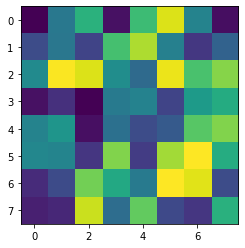

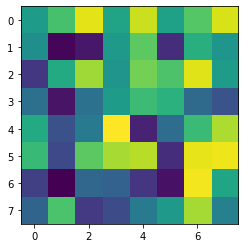

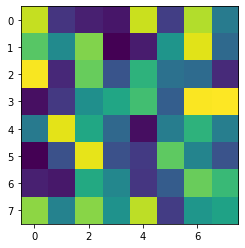

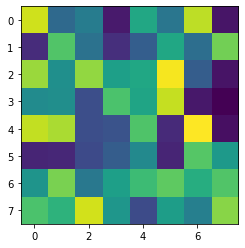

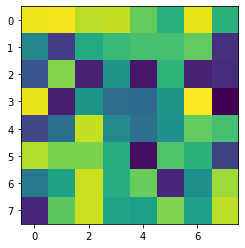

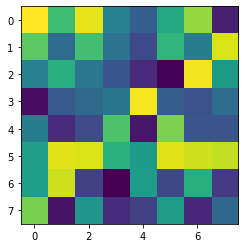

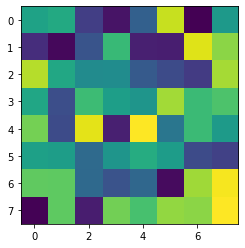

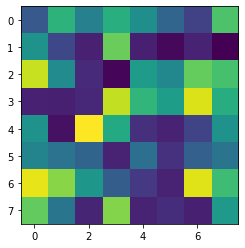

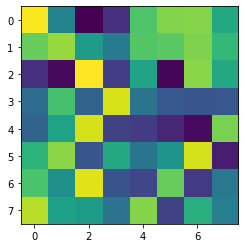

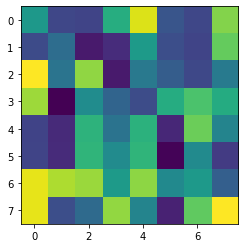

In [60]:
for _ in range(10):

    arr = np.random.rand(8, 8)
    plt.imshow(arr)
    plt.show()

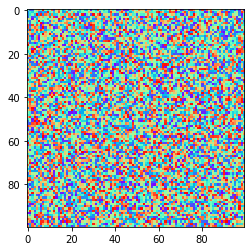

In [73]:
arr = 100*np.random.rand(100, 100)
plt.imshow(arr, cmap=cm.rainbow);

In [77]:
arrs = [np.zeros((3, 3)) for _ in range(3)]

for j in range(len(arrs)):
    arrs[j][1, j] = 1

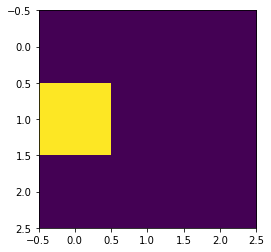

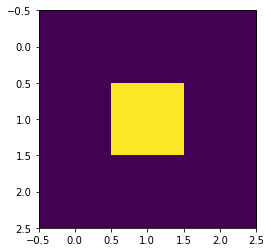

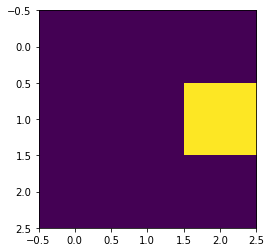

In [78]:
for arr in arrs:
    plt.imshow(arr)
    plt.show()

## Von Neumann Succession

In [90]:
vn0 = set()

def vn_succ(ord_):
    return ord_.union({ord_})

In [98]:
vn_succ(vn0)

TypeError: unhashable type: 'set'

## Random Forest from Trees

In [254]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [392]:
X, y = make_classification(flip_y=0.3,
                           n_samples=1000,
                           class_sep=5,
                           n_informative=15,
                           random_state=42)

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [394]:
def simple_bagger(X_train, y_train, X_test=None, y_test=None, n_trees=10):
    import numpy as np
    if X_test is None:
        X_test = X_train
    if y_test is None:
        y_test = y_train
    y_train = y_train.reshape(-1, 1)
    data = np.hstack((X_train, y_train))
    num_recs = y_train.shape[0]
    preds = []
    for _ in range(n_trees):
        subset = np.random.choice(num_recs, size=num_recs//10)
        training = data[subset, :]
        ct = DecisionTreeClassifier(random_state=42)
        ct.fit(training[:, :-1], training[:, -1])
        preds.append(ct.predict_proba(X_test))
    return np.mean(preds, axis=0).argmax()

#simple_bagger(X_train, y_train)

ct = DecisionTreeClassifier(random_state=42)

ct.fit(X_train, y_train)
ct.score(X_test, y_test)

accuracy_score(y_test, simple_bagger(X_train, y_train, X_test, y_test))

def bagger(X_train, y_train, X_test=None, y_test=None, n_trees=10, random_forest=False):
    import numpy as np
    if X_test is None:
        X_test = X_train
    if y_test is None:
        y_test = y_train
    y_train = y_train.reshape(-1, 1)
    data = np.hstack((X_train, y_train))
    num_recs = X_train.shape[0]
    num_feats = X_train.shape[1]
    preds = []
    for _ in range(n_trees):
        subset = np.random.choice(num_recs, size=num_recs//10).reshape(-1, 1)
        if random_forest == True:
            subfeatures = np.random.choice(num_feats, size=int(np.sqrt(num_feats)))
        else:
            subfeatures = np.arange(num_feats)
        subfeatures_y = np.append(subfeatures, -1).reshape(1, -1)
        training = data[subset, subfeatures_y]
        ct = DecisionTreeClassifier(random_state=42)
        ct.fit(training[:, :-1], training[:, -1])
        preds.append(ct.predict_proba(X_test[:, subfeatures]))
    return np.mean(preds, axis=0).argmax()

accuracy_score(y_test, bagger(X_train, y_train, X_test, y_test, random_forest=True))

## Zoom Info

Seems like a dead end inasmuch as Zoom asks for image identification when logging in via Selenium.

In [39]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests as rq

In [52]:
#page = rq.get('https://zoom.us/account/my/report?from=07/26/2021&to=07/30/2021')

In [57]:
page_login = 'https://zoom.us/signin'

In [56]:
soup = BeautifulSoup(page.content)

In [55]:
soup.find_all('table')

[]

In [338]:
driver = webdriver.Chrome(executable_path='/Users/gdamico/Downloads/chromedriver')

In [59]:
driver.get(page_login)

In [61]:
email = driver.find_element_by_id('email')

In [62]:
email.send_keys('greg.damico@flatironschool.com')

In [63]:
pwd = driver.find_element_by_id('password')

In [64]:
pwd.send_keys('g,A,d,g,A,d,9')

In [71]:
btn = driver.find_elements_by_class_name('btn')

In [72]:
btn

[<selenium.webdriver.remote.webelement.WebElement (session="522fc2cd974465dcb04340bec7b54a61", element="0.2868743490029062-3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="522fc2cd974465dcb04340bec7b54a61", element="0.2868743490029062-4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="522fc2cd974465dcb04340bec7b54a61", element="0.2868743490029062-5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="522fc2cd974465dcb04340bec7b54a61", element="0.2868743490029062-6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="522fc2cd974465dcb04340bec7b54a61", element="0.2868743490029062-7")>]

In [75]:
btn[1].click()

In [28]:
#table = driver.find_element_by_id('meeting_list')

In [36]:
js = "document.getElementsByClassName('col6')[0].click()"

In [37]:
driver.execute_script(js)

### Manual Downloads

In [392]:
dfs = []
for j in range(6, 13):
    dfs.append(pd.read_csv(f'/Users/gdamico/Downloads/participants_97329952849 ({j}).csv'))

In [399]:
semiweek10 = pd.concat([df.groupby('Name (Original Name)').count() for df in dfs])

In [404]:
semiweek10.reset_index()['Name (Original Name)'].value_counts()

Ian Sharff            7
Sejin Jang            7
Manav Kahlon          7
mia fryer             7
Douglas Lu            7
Harmandip Singh       7
Eddie Lin             7
Nina Vergara          7
Tony Bai              7
Jesús Baquiax         7
Arthur Kim            7
Sanjit Varma          7
Anthony Conte         7
Greg Damico           7
Samantha Baltodano    7
Shane M               7
Brett Z               7
Ben B                 7
Ben McCarty           6
nate walter           6
Jax                   6
Chris Lewis           5
nate                  2
Max Barry             2
Name: Name (Original Name), dtype: int64

## Exit Tickets

Promising!

In [349]:
driver = webdriver.Chrome(executable_path='/Users/gdamico/Downloads/chromedriver')

In [351]:
driver.implicitly_wait(10)

In [352]:
canvas_login = 'https://learning.flatironschool.com/'

driver.get(canvas_login)

In [353]:
email = driver.find_element_by_id('user-email')

email.send_keys('greg.damico@flatironschool.com')

pwd = driver.find_element_by_id('user-password')

pwd.send_keys('g,A,d,g,A,d,9')

In [354]:
bttns = driver.find_elements_by_class_name('button')

bttns[1].click()

In [300]:
# courses = driver.find_element_by_css_selector("a[href='https://learning.flatironschool.com/']")

# courses.click()

In [184]:
driver.current_url

'https://learning.flatironschool.com/'

In [355]:
course_no = "a[href='/courses/4243']"
ph1_071921 = driver.find_element_by_css_selector(course_no)

In [356]:
#ph1_071921 = driver.find_element_by_css_selector("a[href='/courses/4243']")

ph1_071921.click()

In [193]:
quizzes = course_no[:-2]+"/quizzes']"

In [194]:
quizzes = driver.find_element_by_css_selector(course_no[:-2])

In [357]:
quizzes = driver.find_element_by_css_selector("a[href='/courses/4243/quizzes']")

quizzes.click()

In [358]:
items = driver.find_elements_by_partial_link_text('Exit Ticket')

In [359]:
items_clean = [item for item in items if 'Manage' not in item.text]

names = [item.text for item in items_clean]

In [360]:
names

['Data Science Environments Exit Ticket',
 'Bash Exit Ticket',
 'Git Exit Ticket',
 'Python Data Manipulation Exit Ticket',
 'Data Visualization Exit Ticket',
 'Data Analysis with CSVs Exit Ticket',
 'Data Analysis with JSONs Exit Ticket',
 'Pandas DataFrames Exit Ticket',
 'Pandas Data Cleaning Exit Ticket',
 'Aggregating and Combining DataFrames Exit Ticket',
 'Descriptive Analysis Exit Ticket',
 'SQL Queries Exit Ticket',
 'SQL Joins and Aggregation Exit Ticket',
 'SQL Subqueries and Implementations Exit Ticket',
 'APIs Exit Ticket',
 'Web Scraping Exit Ticket',
 'Collaborating with Git Exit Ticket']

In [361]:
len(items)

34

In [108]:
items[0].

<selenium.webdriver.remote.webelement.WebElement (session="522fc2cd974465dcb04340bec7b54a61", element="0.9246222379986417-28")>

In [109]:
items[0].click()

In [125]:
driver.current_url

'https://learning.flatironschool.com/courses/4243/quizzes/20072'

In [127]:
stats = driver.find_element_by_partial_link_text('Quiz Statistics')

In [128]:
stats.click()

In [129]:
anal_btn = driver.find_element_by_partial_link_text('Student Analysis')

In [130]:
anal_btn.click()

In [133]:
dfs = []
dfs.append(pd.read_csv('/Users/gdamico/Downloads/Aggregating and \
Combining DataFrames Exit Ticket Quiz Student Analysis Report (1).csv'))

In [135]:
#dfs[0]

In [207]:
driver.find_element_by_partial_link_text('Quiz Statistics')

<selenium.webdriver.remote.webelement.WebElement (session="59192d2d2a00aec1d26d07027cf4118f", element="0.737407568138944-1")>

In [278]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [362]:
j = 0
for name in names:
    j += 1
    try:
        et = WebDriverWait(driver, 30).\
            until(EC.presence_of_element_located((By.LINK_TEXT, name)))
        print("found quiz")
        et.click()
        stats = WebDriverWait(driver, 30).\
            until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,
                                                  'Quiz Statistics')))
        print("found quiz stats button")
        stats.click()
        anal_btn = WebDriverWait(driver, 30).\
            until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,
                                                  'Student Analysis')))
        print("found student analysis button")
        anal_btn.click()
        quizzes = WebDriverWait(driver, 30).\
            until(EC.presence_of_element_located((By.CSS_SELECTOR,
                                                  "a[href='/courses/4243/quizzes']")))
        print("found link back to quizzes page")
        quizzes.click()
    
    except:
        print(f"No success on the {j}-th attempt.")
        continue

found quiz
No success on the 1-th attempt.
found quiz
No success on the 2-th attempt.
found quiz
found quiz stats button
No success on the 3-th attempt.
No success on the 4-th attempt.
No success on the 5-th attempt.
No success on the 6-th attempt.
No success on the 7-th attempt.
No success on the 8-th attempt.
No success on the 9-th attempt.
No success on the 10-th attempt.
No success on the 11-th attempt.
No success on the 12-th attempt.
No success on the 13-th attempt.
No success on the 14-th attempt.
No success on the 15-th attempt.
No success on the 16-th attempt.
No success on the 17-th attempt.


In [138]:
quizzes = driver.find_element_by_css_selector("a[href='/courses/4243/quizzes']")

In [139]:
quizzes.click()

In [143]:
phase1_titles = []
for tkt in driver.find_elements_by_partial_link_text('Exit Ticket'):
    phase1_titles.append(tkt.text)

In [309]:
phase1 = [title + ' Quiz Student Analysis Report.csv' for title in phase1_titles]
phase1

['Aggregating and Combining DataFrames Exit Ticket Quiz Student Analysis Report.csv',
 'APIs Exit Ticket Quiz Student Analysis Report.csv',
 'Bash Exit Ticket Quiz Student Analysis Report.csv',
 'Collaborating with Git Exit Ticket Quiz Student Analysis Report.csv',
 'Data Analysis with CSVs Exit Ticket Quiz Student Analysis Report.csv',
 'Data Analysis with JSONs Exit Ticket Quiz Student Analysis Report.csv',
 'Data Science Environments Exit Ticket Quiz Student Analysis Report.csv',
 'Data Visualization Exit Ticket Quiz Student Analysis Report.csv',
 'Descriptive Analysis Exit Ticket Quiz Student Analysis Report.csv',
 'Git Exit Ticket Quiz Student Analysis Report.csv',
 'Pandas Data Cleaning Exit Ticket Quiz Student Analysis Report.csv',
 'Pandas DataFrames Exit Ticket Quiz Student Analysis Report.csv',
 'Python Data Manipulation Exit Ticket Quiz Student Analysis Report.csv',
 'SQL Joins and Aggregation Exit Ticket Quiz Student Analysis Report.csv',
 'SQL Queries Exit Ticket Quiz Stud

In [311]:
dfs = []
for title in phase1:
    try:
        dfs.append(pd.read_csv(f'~/Downloads/{title}'))
    except:
        continue

In [315]:
len(dfs)

3

## Jesse Steinweg-Woods's [Rec System Example](https://jessesw.com/Rec-System/)

In [457]:
import scipy.sparse as sparse
#from scipy.sparse.linalg import spsolve

In [458]:
website_url = 'http://archive.ics.uci.edu/ml/\
machine-learning-databases/00352/Online%20Retail.xlsx'
retail_data = pd.read_excel(website_url) # This may take a couple minutes

In [459]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [460]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [461]:
retail_data_clean = retail_data.copy().dropna()

In [462]:
retail_data_clean['CustomerID'] = retail_data_clean['CustomerID'].map(int)
preds = retail_data_clean[['StockCode', 'Quantity', 'CustomerID']]
grouped_cleaned = preds.groupby(['CustomerID', 'StockCode']).sum().reset_index()

In [463]:
grouped_cleaned['Quantity'] = grouped_cleaned['Quantity'].map(lambda x: 1 if x == 0 else x)
grouped_purchased = grouped_cleaned[grouped_cleaned['Quantity'] > 0]

In [470]:
# Get unique customers
customers = list(np.sort(grouped_purchased.CustomerID.unique()))

# Get unique products
products = list(grouped_purchased['StockCode'].unique())

# Get purchases
quantity = list(grouped_purchased['Quantity'])

# Renumbering our customers
rows = grouped_purchased['CustomerID'].astype('category').cat.codes
print(grouped_purchased['CustomerID'].astype('category').head(), rows.head())

0    12346
1    12347
2    12347
3    12347
4    12347
Name: CustomerID, dtype: category
Categories (4338, int64): [12346, 12347, 12348, 12349, ..., 18281, 18282, 18283, 18287] 0    0
1    1
2    1
3    1
4    1
dtype: int16


In [472]:
# Renumbering our products
cols = grouped_purchased.StockCode.astype('category').cat.codes

In [473]:
purchases_sparse = sparse.csr_matrix((quantity, (rows, cols)),
                                     shape=(len(customers), len(products)))

In [474]:
purchases_sparse

<4338x3664 sparse matrix of type '<class 'numpy.longlong'>'
	with 266723 stored elements in Compressed Sparse Row format>

In [475]:
# Sparsity calculation
matrix_size = purchases_sparse.shape[0]*purchases_sparse.shape[1]
num_purchases = len(purchases_sparse.nonzero()[0])
sparsity = 100*(1 - (num_purchases/matrix_size))
print(f"Our matrix is {round(sparsity, 2)}% sparse.")

Our matrix is 98.32% sparse.


In [476]:
def implicit_weighted_ALS(training_set,
                          lambda_val=0.1,
                          alpha=40,
                          iterations=10,
                          rank_size=20,
                          seed=0):
    '''
    Implicit weighted ALS taken from Hu, Koren, and Volinsky 2008.
    Designed for alternating least squares and implicit
    feedback based collaborative filtering. 
    
    parameters:
    
    training_set - Our matrix of ratings with shape m x n, where m
    is the number of users and n is the number of items.
    Should be a sparse csr matrix to save space. 
    
    lambda_val - Used for regularization during alternating
    least squares. Increasing this value may increase bias
    but decrease variance. Default is 0.1. 
    
    alpha - The parameter associated with the confidence matrix
    discussed in the paper, where C_ui = 1 + alpha*R_ui. 
    The paper found a default of 40 most effective.
    Decreasing this will decrease the variability in confidence between
    various ratings.
    
    iterations - The number of times to alternate between both user-
    feature vectors and item-feature vectors. More iterations will
    allow better convergence at the cost of increased computation. 
    The authors found 10 iterations was sufficient, but more may be
    required to converge. 
    
    rank_size - The number of latent features in the user-/item-feature
    vectors. The paper recommends varying this 
    between 20-200. Increasing the number of features may overfit
    but could reduce bias. 
    
    seed - Set the seed for reproducible results
    
    returns:
    
    The feature vectors for users and items. The dot product of these
    feature-vectors should give you the expected 
    "rating" at each point in your original matrix. 
    '''
    
    # first set up our confidence matrix
    
    conf = (alpha*training_set) # To allow the matrix to stay sparse,
                                # add one later when each row is taken 
                                # and converted to dense. 
    num_user = conf.shape[0]
    num_item = conf.shape[1] # Get the size of our original ratings matrix, m x n
    
    # initialize our X/Y feature-vectors randomly with a set seed
    rstate = np.random.RandomState(seed)
    
    # generate random matrices
    X = sparse.csr_matrix(rstate.normal(size=(num_user, rank_size)))
    Y = sparse.csr_matrix(rstate.normal(size=(num_item, rank_size)))
    
    X_eye = sparse.eye(num_user)
    Y_eye = sparse.eye(num_item)
    lambda_eye = lambda_val * sparse.eye(rank_size) # Our regularization term lambda*I. 
    
    # We can compute this before iteration starts. 
    
    # Begin iterations
   
    for iter_step in range(iterations): # Iterate back and forth between
                                        # solving X given fixed Y and vice versa
        
        # Compute yTy and xTx at beginning of each iteration to save computing time
        yTy = Y.T.dot(Y)
        xTx = X.T.dot(X)
        
        # Begin iteration to solve for X based on fixed Y
        for u in range(num_user):
            
            # Grab user row from confidence matrix and convert to dense
            conf_samp = conf[u, :].toarray()
            pref = conf_samp.copy()
            
            # Create binarized preference vector
            pref[pref != 0] = 1
            
            # Get Cu - I term, don't need to subtract 1 since we never added it
            CuI = sparse.diags(conf_samp, [0])
            
            # This is the yT(Cu-I)Y term
            yTCuIY = Y.T.dot(CuI).dot(Y)
            
            # This is the yTCuPu term, where we add the eye back in:
            # Cu - I + I = Cu
            yTCupu = Y.T.dot(CuI + Y_eye).dot(pref.T)
            X[u] = sparse.linalg.spsolve(yTy + yTCuIY + lambda_eye, yTCupu) 
            # Solve for Xu = ((yTy + yT(Cu-I)Y + lambda*I)^-1)yTCuPu,
            # equation 4 from the paper  
        
        # Begin iteration to solve for Y based on fixed X 
        for i in range(num_item):
            
            # transpose to get it in row format and convert to dense
            conf_samp = conf[:, i].T.toarray()
            pref = conf_samp.copy()
            
            # Create binarized preference vector
            pref[pref != 0] = 1
            
            # Get Ci - I term, don't need to subtract 1 since we never added it
            CiI = sparse.diags(conf_samp, [0])
            
            # This is the xT(Cu-I)X term
            xTCiIX = X.T.dot(CiI).dot(X)
            
            # This is the xTCiPi term
            xTCiPi = X.T.dot(CiI + X_eye).dot(pref.T)
            Y[i] = sparse.linalg.spsolve(xTx + xTCiIX + lambda_eye, xTCiPi)
            # Solve for Yi = ((xTx + xT(Cu-I)X) + lambda*I)^-1)xTCiPi,
            # equation 5 from the paper
    # End iterations
    
    # Transpose at the end to make up for not being transposed at the beginning. 
    # Y needs to be rank x n. Keep these as separate matrices for scale reasons. 
    return X, Y.T

In [478]:
user_vecs, item_vecs = implicit_weighted_ALS(purchases_sparse,
                                             lambda_val=0.1,
                                             alpha=15,
                                             iterations=10,
                                             rank_size=20)

In [479]:
user0_ratings_pred = user_vecs[0, :].dot(item_vecs).toarray()[0, :]

In [480]:
user0_ratings_pred[user0_ratings_pred > 0.1]

array([0.10494322, 0.11381391, 0.13002682, 0.14069729, 0.16350271,
       0.10110354, 0.10134013, 0.10275236])

In [487]:
user_vecs.shape

(4338, 20)

In [489]:
item_vecs.shape

(20, 3664)

In [488]:
ratings.shape

(4338, 3664)

In [511]:
# Error Calculation

guess = user_vecs.dot(item_vecs).todense().flatten()
truth = ratings.flatten()

err = 0
ctr = 0

for i in range(10000):
    if truth[0, i] != 0:
        ctr += 1
        err += (truth[0, i] - guess[0, i])**2
        print(truth[0, i], guess[0, i])
np.sqrt(err / ctr), ctr

1 0.14069728578999188
24 0.9265612355443679
36 0.8672926002671694
6 0.7951717072788043
40 0.9529058916007898
12 0.7082969722184629
6 0.6275218424927448
10 0.7913620362507889
6 0.7494663717360075
12 0.7758747614816444
30 0.8808229071128382
10 0.7690086065755924
12 0.825752078490077
24 0.8715358170077128
6 0.7540771110638139
12 0.8986956406901243
72 1.0547313103039517
48 1.0390168888465037
12 0.9414161755474937
48 1.0021058188005016
48 0.9557107825472729
6 0.6356519875543638
12 0.7702273237168787
48 0.9998768742051961
72 0.9974913949180394
6 0.8992546665749188
12 0.8986898778561144
32 1.0035658227004434
8 0.8782609296996501
16 1.026322584732649
28 0.9759396700224072
12 0.9582319073516332
48 0.9810147500791495
12 1.1908782690353685
15 0.979315485802341
6 1.0353911273593022
108 0.9760774363594077
12 1.0490323102518895
12 0.9354586282375824
8 0.8563104537099853
12 0.9805673989964048
12 0.8414703323115933
12 0.9512555839611774
12 0.9619602135598344
24 0.9635530848654736
20 1.0295254979847763

(60.70120005658853, 125)

In [481]:
user0_ratings_pred[1927]

0.14069728578999188

In [485]:
purchases_sparse.todense()[0, 1925:1930]

matrix([[0, 0, 1, 0, 0]], dtype=int64)

In [482]:
ratings = purchases_sparse.todense()

In [450]:
list(np.array(ratings[0, :])[0].reshape(1, -1)[0]).index(1)

1927

In [486]:
user0_ratings_pred[1925:1930]

array([0.08523272, 0.13002682, 0.14069729, 0.16350271, 0.04224508])

In [484]:
ratings[0, :]

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)